# [Computational Social Science] Neural Networks

In this lab, we will introduce and explore neural networks. Neural nets are a popular example of "artificial intelligence." They can improve on many of the models we have learned so far, but are not without their limitations!

<img src="../../images/ai now and then.jpg" />

Sklearn does have neural network implementations, but these may not always be adequate. Neural networks benefit from access to more powerful hardware, so we will also see some examples with more common neural network libraries. If you do not already have [keras](https://keras.io/) and [tensorflow](https://www.tensorflow.org/) installed, run the following lines of code: 

In [ ]:
#!pip install keras

In [ ]:
#!pip install tensorflow

In [3]:
# import all the needed module
import numpy as np
import keras
import matplotlib.pyplot as plt

# Sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

# Keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

## Neural Networks

Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns.

Neural networks help us cluster and classify. They group unlabeled data according to similarities among the example inputs.

Classification problems depend on labeled datasets, i.e. humans need to label the data for a neural to learn the correlation between labels and data. This is supervised learning. Below, we'll dive into MLP, which utilizes a supervised learning technique.

## Multi-Layer Perceptrons

A multi-layer perceptron (MLP) is a class of neural network that consists of at least three layers of nodes (first layer being inputs and last layer being outputs). Except for the input layer, activation of nodes of a certain layer depends on which nodes are activated in the previous layer. Each node is a neuron that uses a nonlinear activation function. Below is an image that represents a MLP.

<img src="https://www.safaribooksonline.com/library/view/getting-started-with/9781786468574/graphics/B05474_04_05.jpg" style="width: 500px;"/>

# Load Data

For this lab, we will use the famous [Handwritten Digits Data Set](http://yann.lecun.com/exdb/mnist/). The dataset contains images of handwritten number digits from 0 - 9. The training set has 60,000 examples and the test set has 10,000 examples.

In [4]:
# Load digiti data
digits = load_digits()
print('%d samples' %len(digits.target))

1797 samples


How many classes do we have in the target?

In [5]:
print(np.unique(digits.target))

[0 1 2 3 4 5 6 7 8 9]


And let's look at what the features look like:

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Looks like the features are stored as an array! This type of structure is common when working with image and video data. In this case, the values correspond to pixel values in an 8x8 image. Let's plot the first 64 samples to see what we're working with:

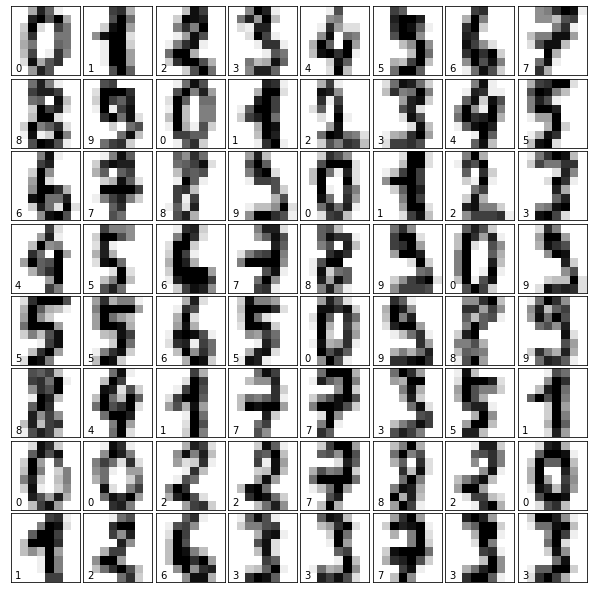

In [7]:
## plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

**Question**: What do you notice about these handwritten digits? Do some of them look ambiguous enough that a computer might struggle to read them?

**Answer**: Some of the digits could be confusing for a computer. For instance some "2s" look like "3s" and "7s" with a dash could be mistake for a "4."

Next, let's make our usual train test splits. Fill in the following code to to do a 80/20 split.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)

We should also be sure to preprocess data. As with more conventional numerical data, the [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) method can be useful here.

In [9]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


# Now apply the transformations to the data:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

Now let's initialize and fit the model! We are going to use a multilayer perception classifier, or [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). Try experimenting with some different parameters to initialize the model, and then fit it. In particular, try using the "hidden_layer_sizes" and "activation" hyperparameters.

In [10]:
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), 
                    activation='logistic', 
                    max_iter = 1000)

# Train the classifier with the traning data
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 30, 30),
              max_iter=1000)

Now let's plot the confusion matrix to take a look at how well we did! Run the code below to plot the confusion matrix. Note that we also call the "predict" function. 

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    fig = plt.figure(figsize=(8, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

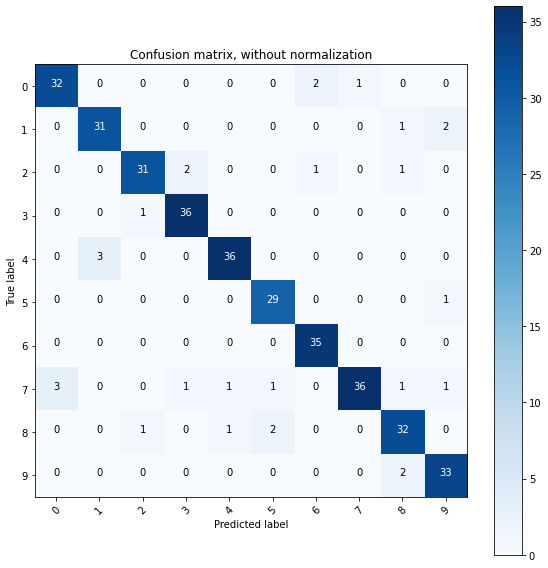

In [12]:
# predict results from the test data
predicted = mlp.predict(X_test_scaled)

# plot the confusion matrix
cm = confusion_matrix(y_test,predicted)
plot_confusion_matrix(cm, classes=digits.target_names,
                      title='Confusion matrix, without normalization')

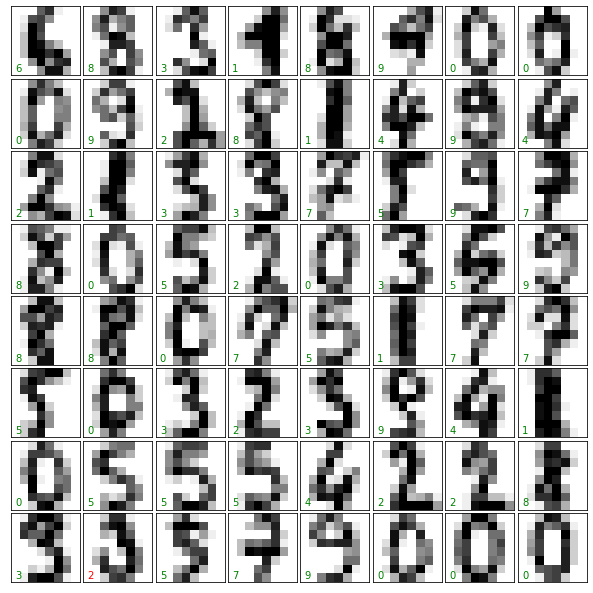

In [13]:
expected = y_test 
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

**Question**: Taking a look at the plot above to see where we correctly classified and misclassified certain digits. Are you surprised by the ones that were misclassified?

**Answer**: The ones that were misclassified do look a little ambiguous, in part because they are a little fuzzy.

## Keras Implementation

Now, let's try thes ame thing with keras. THe main advantage of keras is that it is built on tensorflow, which provides access to the latest deep learning models and can take advantage of higher end hardware than sklearn. We won't be using Graphical Processing Units (GPUs) or Tensor Processing Units (TPUs) in this lab, but it is a good idea to keep them in the back of your mind as you continue to explore AI and deep learning. First, let's reload the dataset, using the keras example this time: 

In [14]:
# load data, and they are saving to the training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
print(f'The dataset contains {len(X_train)} training data examples, and {len(X_test)} test data examples')

The dataset contains 1437 training data examples, and 360 test data examples


Now let's plot the images we're working with. 

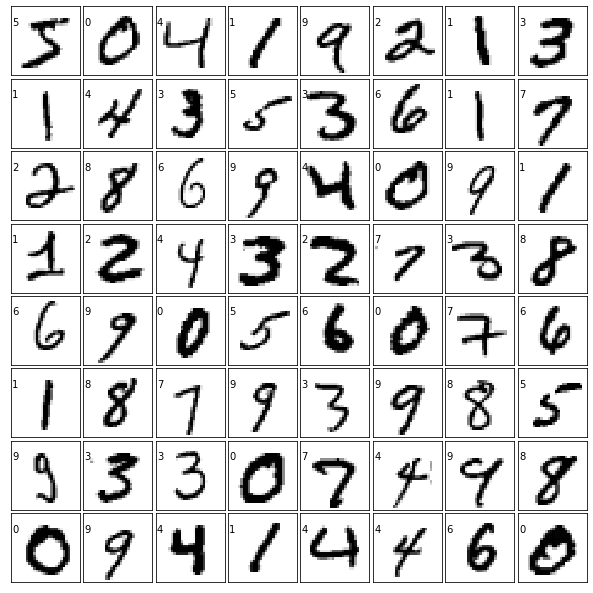

In [16]:
## plot the first 64 samples, and get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(y_train[i]))

Now let's preprocess the data to get it ready for analysis. Run the following code to flatten the training and test features, and normalize the data by dividing the maximum pixel value.

In [17]:
# Flatten the images into 1D array
num_pixels = x_train.shape[1] * x_train.shape[2]
num_pixels

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Convert the data type from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data by dividing the maximum value
x_train /= 255
x_test /= 255

Then use keras [`to_categorical()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) to convert the target label. What process does this remind you from sklearn?



In [18]:
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

**Answer**: This is similar to one-hot encoding from sklearn.

In [21]:
# See what the labeling look like now by printing out the first label
print(y_train[0])

num_classes = y_test.shape[1]
num_classes

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


10

We can build a multilayer perception network by adding layers to the model. Let's start with an empty stack:

In [22]:
model = Sequential()

Create an input layer using the Dense function (refer to <a href="https://keras.io/layers/core/">this doc</a>), then add the layer to our model using `model.add(...)`. The input layer should use ['relu'](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation, a 'normal' [kernel_initializer](https://datascience.stackexchange.com/questions/37378/what-are-kernel-initializers-and-what-is-their-significance), and the number of pixels for input_dim. 'Relu' is a "rectified" activation function that is flat before the activiation threshold and then positively slopes up. The kernel initializer determines the probability distribution to draw the initial weights from. 

In [23]:
"""
Dense(...) creates a regular densely connected layer. 
relu is a rectifier activation function.
"""
model.add(
    Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu')
)

Add in the output layer to our model. We then initialize the output layer using a ["softmax"](https://en.wikipedia.org/wiki/Softmax_function) activation function. Softmax is an extension of logistic regression that extends to multiple categories.

In [24]:
"""
A softmax activation function is used on the output layer to turn the outputs into 
probability-like values
"""
model.add(
    Dense(num_classes, kernel_initializer='normal', activation='softmax')
)

Compile our model. We will use ["categorical crossentropy"](https://machinelearningmastery.com/cross-entropy-for-machine-learning/) as our loss measure. Cross-entropy is a measure of the difference in the probability distribution implied by the predictions and the distribution implied by the actual values. ['Adam'](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) stands for adaptive moment estimation. At a high level, it utilizes second moments to update the [learning rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/) dynamically. The learning rate controls how much the model will update when faced with errors.

In [25]:
"""
categorical_crossentropy is a logarithmic loss function and
adam is a gradient descent algorithm
"""
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Let's now fit our model on the training dataset. We fit our model over 10 epochs and update it every 200 images. It might take a few minutes.

In [26]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 6s - loss: 0.2785 - accuracy: 0.9204 - val_loss: 0.1373 - val_accuracy: 0.9592
Epoch 2/10
300/300 - 5s - loss: 0.1117 - accuracy: 0.9684 - val_loss: 0.0931 - val_accuracy: 0.9723
Epoch 3/10
300/300 - 6s - loss: 0.0714 - accuracy: 0.9792 - val_loss: 0.0778 - val_accuracy: 0.9760
Epoch 4/10
300/300 - 5s - loss: 0.0522 - accuracy: 0.9856 - val_loss: 0.0718 - val_accuracy: 0.9780
Epoch 5/10
300/300 - 5s - loss: 0.0365 - accuracy: 0.9899 - val_loss: 0.0666 - val_accuracy: 0.9794
Epoch 6/10
300/300 - 5s - loss: 0.0264 - accuracy: 0.9933 - val_loss: 0.0621 - val_accuracy: 0.9810
Epoch 7/10
300/300 - 5s - loss: 0.0207 - accuracy: 0.9949 - val_loss: 0.0591 - val_accuracy: 0.9806
Epoch 8/10
300/300 - 5s - loss: 0.0154 - accuracy: 0.9963 - val_loss: 0.0610 - val_accuracy: 0.9819
Epoch 9/10
300/300 - 5s - loss: 0.0107 - accuracy: 0.9978 - val_loss: 0.0588 - val_accuracy: 0.9828
Epoch 10/10
300/300 - 5s - loss: 0.0080 - accuracy: 0.9985 - val_loss: 0.0727 - val_accuracy: 0.9784

## Convolutional Nerual Networks

MLPs did give us pretty good accuracy. However, As each pixel of an image is an input, we will have too many inputs for a large image. Convolutional neural nets, on the other hand, can take in 3-D inputs (2D + color) instead of just 1-D.

<img src="https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/jcr:content/mainParsys/image_copy.adapt.full.high.jpg/1517522275430.jpg" style="width: 600px;"/>

#### Filtering

ConvNets have "features" and match them with parts of an image rather than the whole thing. 

<img src="../../images/match_pieces.png" style="width: 500px;"/>

In the example above, we have three features: left-to-right diagonal, central X, and right to left diagonal. To match features, we use a process called filtering.

1. Assign each black pixel -1 and each white pixel 1. 
2. Line up a feature with an image patch (for example, line up left-to-right diagonal with the green box above)
3. Multiply each feature pixel with the corresponding image patch pixel
4. Take the average of the products

<b>Question:</b> In the example above when we match the left-to-right diagonal feature with the green box, what would the process output?

<b>Answer: 1</b>

#### Convolutional Layer
 
The process of filtering for every possible image patch with every feature.

<img src="../../images/convolution.png" style="width: 500px;"/>

As you can see in the image above, after applying our left-to-right diagonal filter, we get higher scores on the left to right diagonal.

<b>Question:</b> If we apply the central X filter in this example, where will the highest score occur?

<b>Answer: The very center of the entire image</b>

#### ReLU (Rectified Linear Units)

This process is applied on filtered images. It simply changes every negative value to 0 and leaves positive values unchanged.

#### Pooling Layer

In this layer, we shrink the filtered images by the following process:
1. Pick a window size and a stride size
2. Walk our window on the filtered image, each time shifting by the stride size
3. For each step, take the maximum score contained in the window

<img src="../../images/pooling.png" style="width: 500px;"/>

This layer helps because it does not care about where in the window the maximum value occurs, i.e. it's less sensitive to specific positioning of pixels.

<b>Question:</b> How would the pooling layer help in classifying digits? 

<b>Answer: Handwritten digits follow a general pattern but where each pixel lands can be undeterminstic. Matching parts of an image can tell us which general pattern occurs without caring too much about where it occurs.</b>

#### Fully Connected Layer

This layer flattens the pooled images and each value gets a vote, which is how strongly that value suggests a certain outcome.

One question you might have now is where do the initial features and voting weights come from. They are obtained by a process called <a href="https://brilliant.org/wiki/backpropagation/">backpropragation</a>, which we don't have enough time to explain here.

Now we've learned that the layers are combined together: <b>convolutional + ReLU + pooling</b> constitute the first part while <b>fully connected</b> the second. One note is that each part can be applied multiple times, as we can see in [the overview of a CNN at the beginning](#conv_image).

### Create a CNN

Keras also provides useful methods to create a CNN.

In [ ]:
# importing dependencies
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')
#K.set_image_dim_ordering('th')
from keras.datasets import mnist

In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height]. We'll set the pixels dimension to 1 because the pixel values in MNIST are gray scale. As a reminder, all images in MNIST are 28x28.

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to [samples][width][height][pixels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Below, fill out the blanks to normalize the datasets and one hot encode the output values.

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Let's define a function that creates our CNN. Read through the comments to understand what each line does.

In [ ]:
def CNN_model():
    # create model
    model = Sequential()
    
    # A convolutional layer that has 32 features of size 5x5
    #model.add(Conv2D(32, (5, 5), input_shape=(1,28, 28), activation='relu', data_format = 'channels_first'))
    model.add(Conv2D(32, (3, 3), activation = "relu", kernel_initializer = "he_uniform", input_shape = (28, 28, 1)))

    # A pooling layer with a window size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # A dropout layer that randomly excludes 20% of neurons in the layer 
    model.add(Dropout(0.2))
    
    # A flatten layer
    model.add(Flatten())
    
    # A fully connected layer with 128 neurons
    model.add(Dense(128, activation='relu'))
    
    # An output layer with softmax as in MLP
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model as before in MLP
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = CNN_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Now let's experiment with the parameters: number of features, size of features, size of the window in pooling, dropout percentage, and so on. Modify the parameters to your best judgment in the function below.

In [ ]:
def diff_CNN_model():
    # create model
    model = Sequential()
    
    # A convolutional layer that has 32 features of size 5x5
    model.add(Conv2D(32, (3, 3), activation = "relu", kernel_initializer = "he_uniform", input_shape = (28, 28, 1)))
    
    # A pooling layer with a window size of 2x2
    model.add(MaxPooling2D(pool_size=(4, 4)))
    
    # A dropout layer that randomly excludes 20% of neurons in the layer 
    model.add(Dropout(0.5))
    
    # A flatten layer
    model.add(Flatten())
    
    # A fully connected layer with 128 neurons
    model.add(Dense(128, activation='relu'))
    
    # An output layer with softmax as in MLP
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model as before in MLP
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = diff_CNN_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Do you get different accuracies for the two different models? Make some conclusions about different parameters.

---
Authored by Aniket Kesari. Materials adapted from D-Lab [ANN Fundamentals](https://github.com/dlab-berkeley/ANN-Fundamentals/tree/master/notebooks) and LS123 Data, Prediction, and Law [Neural Networks](https://github.com/Akesari12/LS123_Data_Prediction_Law_Spring-2019/tree/master/labs/Neural%20Nets).